# Signal and Image Processing (SIP) SS25

##  Hilbert Transform Tutorial

### Import packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Analytic Signal

### Define plot function

In [ ]:
# Function for plotting the signal, with parameters x (signal) and t (time array)
def plot_x(x,t=None):
    
    # Define figure size
    plt.figure(figsize=(15,5))
    # Plot the signal x in seconds
    if t is not None:
        plt.plot(t,x)
        plt.xlabel('Time (s)')
    else:
        # If no time array is provided, use the index of x as time
        plt.plot(x)
    # Label the axes
    plt.ylabel('Amplitude (a.u.)')
    # Show grid in plot
    plt.grid()
    # Show the plot
    plt.show()

### Generate a sine signal and plot it


For sinusoid formula, see [Wikipedia](https://en.wikipedia.org/w/index.php?title=Sine_wave&oldid=1279161490#Sinusoid_form)

In [ ]:
# signal length (s)
T = 1 
# sampling frequency in Hz
fs = 1000
# signal frequency in Hz
f = 1
# signal phase shift in radians
ph = 0

'''
TO-DO: define sine signal x with frequency f, length T, phase ph and sampling frequency fs
'''
# signal length (samples)
N = 0
# samples indices array
n = 0
# sample time array
t = 0
# Add amplitude
A = 1
# sine signal
x = 0

# plot the signal
plot_x(x)

In [ ]:
# Plot the signal x over time t
plot_x(x,t)

### Calculate the analytic signal z

In [ ]:
def analytic_signal(x):
    '''
    TO-DO: Apply Hilbert transform (see steps in lecture note)
    '''

    
    z = 0
    return z

In [ ]:
z = analytic_signal(x)

### Calculate and plot instantaneous amplitude, phase and frequency

In [ ]:
def plot_z(z, t, fs, freq_lim = None):
    '''    
    TO-DO: calculate real_z, imag_z and inst_amp
    '''
    real_z = 0
    imag_z = 0
    inst_amp = 0

    '''
    TO-DO: calculate inst. phase in radians
    '''
    inst_phase = 0
    
    '''
    TO-DO: calculate inst_freq (convert from radians/sample in Hz)
    '''
    inst_freq = 0
    
    # Define figure size
    plt.figure(figsize=(15,10))
    
    # First Subplot with instantaneous amplitude, real and imaginary part of z
    plt.subplot(3,1,1)
    plt.plot(t, real_z, label='real')
    plt.plot(t, imag_z, label='imag')
    plt.plot(t, inst_amp, label='inst amp')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (a.u.)')
    plt.legend()
    plt.grid()
    
    # Second Subplot with instantaneous phase
    plt.subplot(3,1,2)
    plt.plot(t, inst_phase/np.pi, label='inst phase', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (a.u.)')
    plt.legend()
    plt.grid()
    
    # Third Subplot with instantaneous frequency
    plt.subplot(3,1,3)
    plt.plot(t[1:], inst_freq, label='inst freq', color='purple')
    # Set y-lim to avoid rounding errors and computational artefacts
    if freq_lim is not None:
        plt.ylim(freq_lim)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (a.u.)')
    plt.legend()
    plt.grid()

### Plot analytic signal z in time domain

In [ ]:
# Plot the instantaneous amplitude, phase and frequency  
plot_z(z, t, fs, [-1,5])

### Plot analytic signal z in complex plane

In [ ]:
def plot_analytic_signal_3d(t, analytic_signal):
    """
    Plot the analytic signal in 3D with projections.

    Parameters:
    - t: time array
    - analytic_signal: complex analytic signal (real + j * imag)
    """
    # Increase offsets for better separation
    real_offset = np.max(np.real(analytic_signal)) + 0.4  # Shift Imaginary projection RIGHT
    imag_offset = np.min(np.imag(analytic_signal)) - 0.4  # Real projection further DOWN
    time_offset = -0.3  # Move phasor projection further BACK

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # --- Colormap setup ---
    norm_t = (t - t.min()) / (t.max() - t.min())
    colors = cm.rainbow(norm_t)

    # --- NEW ORDER: projections first, analytic signal last ---

    # Plot 4: Phasor in Complex Plane (Real vs Imaginary) at Time = time_offset (further back)
    for i in range(len(t)-1):
        ax.plot(
            [time_offset, time_offset],
            [np.real(analytic_signal[i]), np.real(analytic_signal[i+1])],
            [np.imag(analytic_signal[i]), np.imag(analytic_signal[i+1])],
            color=colors[i],
            label='4. Phasor in Complex Plane' if i == 0 else None
        )

    # Plot 2: Real Signal Projection (Real part vs Time) shifted in Imaginary axis (BOTTOM/behind)
    ax.plot(
        t,
        np.real(analytic_signal),
        np.full_like(t, imag_offset),
        color='#1f77b4',
        label='2. Real Signal'
    )

    # Plot 1: Hilbert Transform Projection (Imaginary part vs Time) shifted in Real axis (RIGHT)
    ax.plot(
        t,
        np.full_like(t, real_offset),
        np.imag(analytic_signal),
        color='#ff7f0e',
        label='1. Hilbert Transform Projection'
    )

    # Plot 3: Analytical Signal in 3D (colored with rainbow colormap)
    for i in range(len(t)-1):
        ax.plot(
            [t[i], t[i+1]],
            [np.real(analytic_signal[i]), np.real(analytic_signal[i+1])],
            [np.imag(analytic_signal[i]), np.imag(analytic_signal[i+1])],
            color=colors[i],
            label='3. Analytical Signal' if i == 0 else None
        )

    # Labels & Legend
    ax.set_xlabel('Time Axis (sec)')
    ax.set_ylabel('Real Axis')
    ax.set_zlabel('Imaginary Axis')
    ax.legend(loc='upper left')

    ax.set_xlim([time_offset - 0.1, np.max(t)])
    ax.set_ylim([-1.5, real_offset + 0.5])
    ax.set_zlim([imag_offset - 0.3, 1.5])

    plt.title('Hilbert Transform & Analytic Signal Visualization')
    plt.tight_layout()
    plt.show()

In [ ]:
def scatter_z(z):
    colors = cm.rainbow(np.linspace(0,1,len(z)))
    plt.figure(figsize=(10,10))
    plt.axhline(0, c='k')
    plt.axvline(0, c='k')
    plt.scatter(np.real(z), np.imag(z), color=colors)
    plt.xlabel('real(z)')
    plt.ylabel('imag(z)')
    plt.grid()
    plt.show()

In [ ]:
# Scatter plot
scatter_z(z)
plot_analytic_signal_3d(t, z)

'''
The signal starts at color purple
'''

### Signal with 2 frequency components

In [ ]:
#Two frequency components
f1 = 7
f2 = 3

# Sum of two sine waves
'''
TO-DO: define sine signal x2 with two frequency components f1 and f2
'''
x2 = 0

# Plot the signal
plot_x(x2,t)

### Calculate and plot instantantaneous amplitude, phase and frequency of new signal

In [ ]:
# Calculate z2
z2 = analytic_signal(x2)

# Plot inst ampl, phase and freq
plot_z(z2,t,fs,[0,10])

### Show complex plane

In [ ]:
scatter_z(z2)
plot_analytic_signal_3d(t, z2)

### More complex signal

In [ ]:
# Six frequency components
freqs = [0.3, 1.9, 3, 11, 17, 31]

# Sum up the individual freq. components
'''
TO-DO: define sine signal x3 with multiple frequency components
'''
x3 = 0

# Plot the new signal
plot_x(x3,t)

### Calculate and plot instantantaneous amplitude, phase and frequency of new signal

In [ ]:
z3 = analytic_signal(x3)
plot_z(z3,t,fs,[-150,150])

### Show complex plane of new signal

In [ ]:
scatter_z(z3)
plot_analytic_signal_3d(t, z3)

## Amplitude and Frequency Modulation

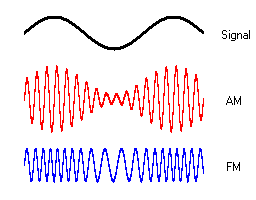

([Source](https://en.m.wikipedia.org/wiki/File:Amfm3-en-de.gif))

### Amplitude modulated signal

In [ ]:
# amplitude modulated signal: combination of two signals

# modulator: signal we want to transmit (acutal interesting signal)
fm = 0.5

'''
Try both signals xm
'''
xm = np.sin(2*np.pi*fm*t)
# xm = np.arange(N)/N 


plot_x(xm)

In [ ]:
# carrier: signal, that carries our interesting signal (transfer interesting signal onto)
fc = 30
'''
TO-DO: Define carrier signal xc
'''
xc = 0

plot_x(xc,t)

In [ ]:
# Amplitdue modulated signal
'''
TO-DO: Calculate amplitude modulated signal x_am
'''
x_am = 0

plot_x(x_am,t)

In [ ]:
z_am = analytic_signal(x_am)
plot_z(z_am, t, fs, [-20,100])

In [ ]:
scatter_z(z_am)
plot_analytic_signal_3d(t, z_am)

### Frequency Modulation

In [ ]:
# frequency modulated signal

# modulator
fm = 4

'''
Try both signals xm
'''
# xm = np.zeros(N)
# xm[0:250] = np.arange(250)/250
# xm[250:750] = np.arange(250,-250,-1)/250
# xm[750:] = np.arange(-250,0)/250

xm = np.sin(2*np.pi*fm*t)

# carrier
fc = 50
'''
TO-DO: Define carrier signal xc
'''
xc = 0

# modulation factor
mf = 1

# add modulator signal to phase of carrier signal
'''
TO-DO: Calculate frequency modulated signal (note that you now add the modulater signal to the phase)
'''
x_fm = 0

# Modulator signal
plot_x(xm,t)
# Carrier signal
plot_x(xc,t)
# Frequncy modulated signal
plot_x(x_fm,t)

In [ ]:
z_fm = analytic_signal(x_fm)
plot_z(z_fm,t,fs,[20,80])

In [ ]:
scatter_z(z_fm)
plot_analytic_signal_3d(t, z_fm)

### Demodulate signal

In [ ]:
# Calculate inst. frequency
'''
TO-DO: Calculate inst. frequency inst_freq with unwrap
'''
inst_freq = 0

plot_x(inst_freq)
plot_x(inst_freq-fc)

# Demodulate: integral of inst freq
'''
TO-DO: Calculate integral of inst frequency (modulator factor!)
'''
xm_demod = 0

plot_x(xm_demod,t[1:])

In [ ]:
scatter_z(z_fm)